### Buisness Case

Purpose: to detect a situation in which fire threatens people
Stakeholder: fire department working on early warning system and
response to fire threats

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import MyFunc as mf

### Notebook Options


In [160]:
# Set table to show all columns
pd.set_option('display.max_columns', None)

### Dataset Imports

In [161]:
# Read train dataset 
df = pd.read_csv('CSV\Fire-Incidents.csv')

### Data Check & Inspection

In [162]:
df.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24T17:42:43,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24T12:45:21,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09T23:36:33,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01T16:30:31,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08T16:44:07,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

In [164]:
df.describe()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude
count,11214.000000,11214.000000,1.121400e+04,11214.000000,11214.000000,11181.000000,11214.000000,11214.000000
mean,0.112538,0.062154,4.294369e+04,17.274835,288.281880,19.582685,43.705190,-79.403323
std,0.456429,0.962587,5.339367e+05,119.071696,107.515995,11.762782,0.051183,0.101086
min,0.000000,0.000000,0.000000e+00,0.000000,111.000000,1.000000,43.588926,-79.635241
25%,0.000000,0.000000,2.500000e+02,0.000000,221.000000,10.000000,43.662474,-79.479273
50%,0.000000,0.000000,2.500000e+03,0.000000,314.000000,19.000000,43.697050,-79.403892
75%,0.000000,0.000000,1.500000e+04,1.000000,346.000000,28.000000,43.747770,-79.337150
max,15.000000,86.000000,5.000000e+07,999.000000,445.000000,44.000000,43.846200,-79.124410


### Data Cleaning

#### Column drop

In [165]:
column_to_drop = ['Business_Impact', 'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time', 'Last_TFS_Unit_Clear_Time']

In [166]:
# Drop not needed columns
df.drop(columns=column_to_drop, inplace= True)

#### Missing Values

<Axes: >

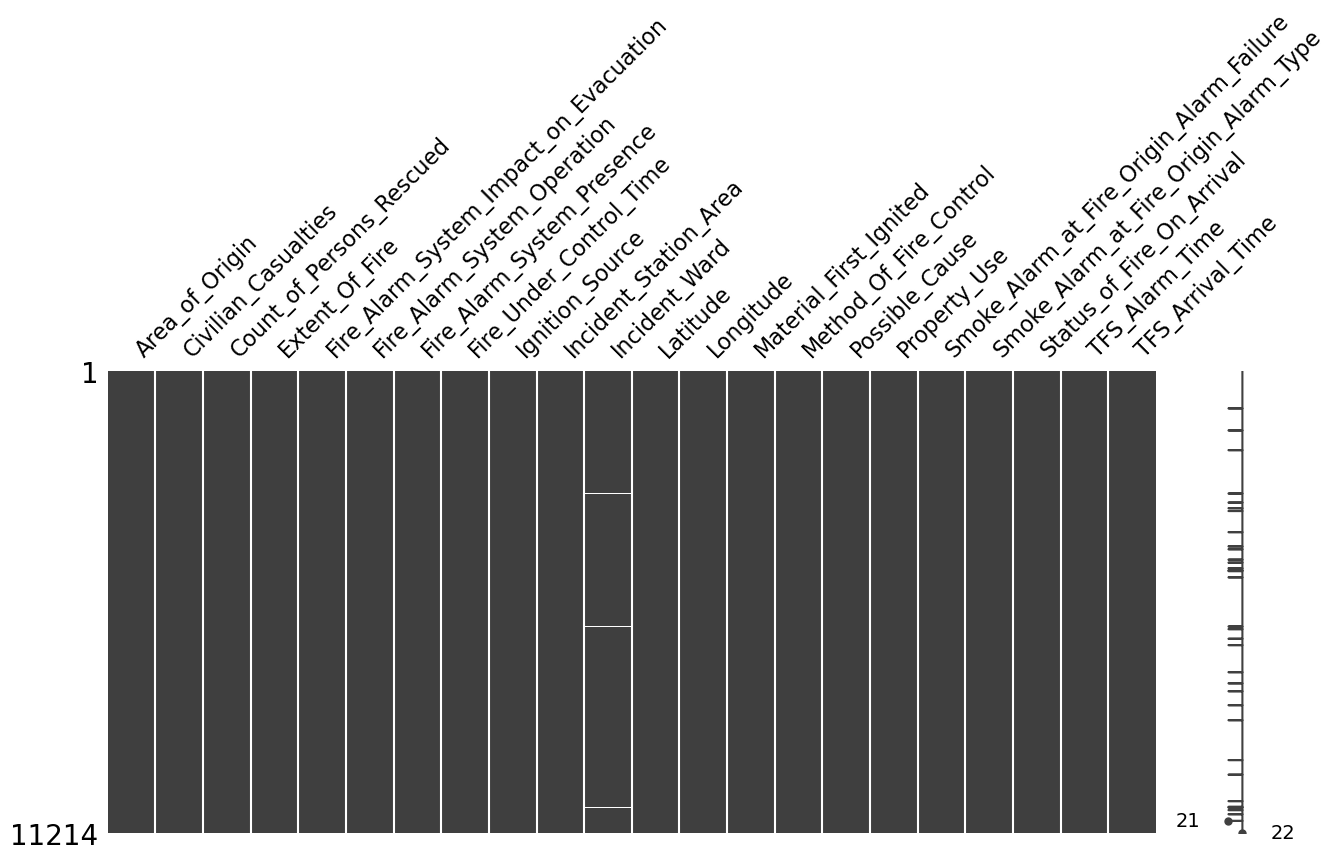

In [167]:
# Missing values on chart
ms.matrix(df, figsize= (15, 6))

In [168]:
# Number of missing values
df.isna().sum()

Area_of_Origin                               0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use                                 0
Smoke_Alarm_at_Fire_Origin_Alarm_Failure     0
Smoke_Alarm_at_Fire_Origin_Alarm_Type        0
Status_of_Fire_On_Arrival                    0
TFS_Alarm_Time                               0
TFS_Arrival_T

In [169]:
# Drop all missing values, less than 5 % of dataset
df.dropna(inplace= True)

In [170]:
# Check if drop was successfully
assert (df.isna().sum().sum() == 0), "There are still missing values !"
print('No missing values in dataset !')

No missing values in dataset !


#### Data Type Change

In [171]:
# Change to datetime
df['TFS_Alarm_Time'] = pd.to_datetime(df['TFS_Alarm_Time'])

In [172]:
# Change to datetime
df['TFS_Arrival_Time'] = pd.to_datetime(df['TFS_Arrival_Time'])

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11181 entries, 0 to 11213
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Area_of_Origin                            11181 non-null  object        
 1   Civilian_Casualties                       11181 non-null  int64         
 2   Count_of_Persons_Rescued                  11181 non-null  int64         
 3   Extent_Of_Fire                            11181 non-null  object        
 4   Fire_Alarm_System_Impact_on_Evacuation    11181 non-null  object        
 5   Fire_Alarm_System_Operation               11181 non-null  object        
 6   Fire_Alarm_System_Presence                11181 non-null  object        
 7   Fire_Under_Control_Time                   11181 non-null  object        
 8   Ignition_Source                           11181 non-null  object        
 9   Incident_Station_Area            

### Feature Enginering

In [174]:
# Value change in civilian_casualties
df.loc[df['Civilian_Casualties'] > 0, ['Civilian_Casualties']] = 1

In [175]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54


In [176]:
df['Civilian_Casualties'].value_counts()

Civilian_Casualties
0    10233
1      948
Name: count, dtype: int64

In [177]:
# Check and change Propert Use column
prop_list = df['Property_Use'].value_counts()

In [178]:
# Create new columns with business or non business value
df['Property_Use_Cat'] = df['Property_Use'].apply(mf.classify_row)

In [179]:
# Create columns with minues between TFS_Arrival_Time - TFS_Alarm_Time
df['Response_Time'] = (df['TFS_Arrival_Time'] - df['TFS_Alarm_Time']) / pd.Timedelta(minutes= 1)

In [180]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Property_Use_Cat,Response_Time
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,Business,4.550000
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,Non-Business,5.183333
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,Business,3.700000
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,Non-Business,2.950000
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,Business,5.066667


#### Encoding

In [181]:
# Label Encoding
lab_encoder = LabelEncoder()

In [182]:
# New Function
def encode_labels(list) :
    """ Function that encode columns to label

    Args: 
        list -> type List, columns that need to be encoded
    return dataframe
    """
    for col in list:
        df[col] = lab_encoder.fit_transform(df[col])
    return df

In [183]:
columns_to_lab_encode = ['Area_of_Origin', 'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation', 'Ignition_Source', 'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause', 'Status_of_Fire_On_Arrival']

In [184]:
encode_labels(columns_to_lab_encode)

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Property_Use_Cat,Response_Time
0,51,0,86,0,4,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,75,114,18.0,43.760357,-79.412479,49,2,19,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),3,2018-08-24 16:49:36,2018-08-24 16:54:09,Business,4.550000
1,11,0,28,1,4,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,48,142,7.0,43.754542,-79.530419,41,3,18,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,1,2018-11-24 07:09:12,2018-11-24 07:14:23,Non-Business,5.183333
2,31,1,16,8,5,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,75,325,27.0,43.657300,-79.373460,49,2,19,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),5,2017-02-09 17:45:07,2017-02-09 17:48:49,Business,3.700000
3,70,0,12,3,6,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,75,332,20.0,43.649350,-79.393700,49,2,19,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,4,2012-10-30 00:42:01,2012-10-30 00:44:58,Non-Business,2.950000
4,62,1,11,8,5,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,40,442,5.0,43.697960,-79.511539,4,2,14,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,2,2018-07-08 04:08:50,2018-07-08 04:13:54,Business,5.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11209,66,0,0,0,0,Fire alarm system operated,Fire alarm system present,2018-02-23T14:50:16,75,313,13.0,43.667295,-79.373778,45,1,6,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),2,2018-02-23 14:35:03,2018-02-23 14:38:33,Business,3.500000
11210,45,0,0,0,0,Fire alarm system operated,Fire alarm system present,2018-02-24T02:04:10,12,222,20.0,43.729364,-79.280725,49,3,2,General Business Office,Not applicable: Alarm operated OR presence/ope...,Interconnected,1,2018-02-24 01:30:45,2018-02-24 01:36:59,Non-Business,6.233333
11211,45,0,0,0,0,Fire alarm system operated,Fire alarm system present,2018-02-24T02:40:00,10,222,20.0,43.729364,-79.280725,14,3,10,General Business Office,Not applicable: Alarm operated OR presence/ope...,Interconnected,1,2018-02-24 02:30:33,2018-02-24 02:35:07,Non-Business,4.566667
11212,51,1,0,1,0,Fire alarm system operated,Fire alarm system present,2018-02-24T00:48:11,65,141,7.0,43.763361,-79.500863,40,2,6,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Battery operated,5,2018-02-24 00:34:12,2018-02-24 00:38:47,Business,4.583333


In [185]:
df['Fire_Alarm_System_Operation'].value_counts()

Fire_Alarm_System_Operation
Fire alarm system operated                  4513
Not applicable (no system)                  3858
Fire alarm system operation undetermined    1417
Fire alarm system did not operate           1393
Name: count, dtype: int64

In [186]:
df['Fire_Alarm_System_Presence'].value_counts()

Fire_Alarm_System_Presence
Fire alarm system present                                                 6208
Not applicable (bldg not classified by OBC OR detached/semi/town home)    1935
No Fire alarm system                                                      1788
Undetermined                                                              1250
Name: count, dtype: int64

In [187]:
# One Hot Encode on chosen columns
df = pd.get_dummies(df, columns= ['Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence', 'Property_Use_Cat'])

In [188]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Response_Time,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Property_Use_Cat_Business,Property_Use_Cat_Non-Business
0,51,0,86,0,4,2018-08-24T17:06:28,75,114,18.0,43.760357,-79.412479,49,2,19,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),3,2018-08-24 16:49:36,2018-08-24 16:54:09,4.550000,True,False,False,False,True,False,False,False,True,False
1,11,0,28,1,4,2018-11-24T07:19:00,48,142,7.0,43.754542,-79.530419,41,3,18,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,1,2018-11-24 07:09:12,2018-11-24 07:14:23,5.183333,False,True,False,False,True,False,False,False,False,True
2,31,1,16,8,5,2017-02-09T18:36:21,75,325,27.0,43.657300,-79.373460,49,2,19,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),5,2017-02-09 17:45:07,2017-02-09 17:48:49,3.700000,False,True,False,False,True,False,False,False,True,False
3,70,0,12,3,6,2012-10-30T01:28:48,75,332,20.0,43.649350,-79.393700,49,2,19,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,4,2012-10-30 00:42:01,2012-10-30 00:44:58,2.950000,False,False,True,False,False,False,False,True,False,True
4,62,1,11,8,5,2018-07-08T04:38:28,40,442,5.0,43.697960,-79.511539,4,2,14,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,2,2018-07-08 04:08:50,2018-07-08 04:13:54,5.066667,False,True,False,False,True,False,False,False,True,False


### Model Preparation

In [189]:
# Copy of dataset
df_mode = df.copy()

In [190]:
# Save new dataset to csv
df_mode.to_csv('CSV/df_mode.csv')

In [191]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Response_Time,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Property_Use_Cat_Business,Property_Use_Cat_Non-Business
0,51,0,86,0,4,2018-08-24T17:06:28,75,114,18.0,43.760357,-79.412479,49,2,19,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),3,2018-08-24 16:49:36,2018-08-24 16:54:09,4.550000,True,False,False,False,True,False,False,False,True,False
1,11,0,28,1,4,2018-11-24T07:19:00,48,142,7.0,43.754542,-79.530419,41,3,18,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,1,2018-11-24 07:09:12,2018-11-24 07:14:23,5.183333,False,True,False,False,True,False,False,False,False,True
2,31,1,16,8,5,2017-02-09T18:36:21,75,325,27.0,43.657300,-79.373460,49,2,19,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),5,2017-02-09 17:45:07,2017-02-09 17:48:49,3.700000,False,True,False,False,True,False,False,False,True,False
3,70,0,12,3,6,2012-10-30T01:28:48,75,332,20.0,43.649350,-79.393700,49,2,19,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,4,2012-10-30 00:42:01,2012-10-30 00:44:58,2.950000,False,False,True,False,False,False,False,True,False,True
4,62,1,11,8,5,2018-07-08T04:38:28,40,442,5.0,43.697960,-79.511539,4,2,14,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,2,2018-07-08 04:08:50,2018-07-08 04:13:54,5.066667,False,True,False,False,True,False,False,False,True,False


In [192]:
new_set_col_drop = ['Fire_Under_Control_Time', 'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'TFS_Alarm_Time', 'TFS_Arrival_Time']

In [193]:
# Drop non needed columns for model
df_mode.drop(columns= new_set_col_drop, inplace= True)

In [194]:
df_mode.sample(10)

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Status_of_Fire_On_Arrival,Response_Time,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Property_Use_Cat_Business,Property_Use_Cat_Non-Business
979,5,0,0,0,4,51,211,23.0,43.82153,-79.25918,11,2,1,4,4.566667,False,False,True,False,False,False,False,True,False,True
3451,40,0,0,0,4,75,225,31.0,43.69287,-79.28902,6,0,19,3,5.333333,False,False,True,False,True,False,False,False,False,True
7861,11,0,0,0,4,69,213,42.0,43.81208,-79.21244,10,2,20,3,6.083333,False,False,True,False,False,False,True,False,True,False
7865,31,0,0,1,4,10,223,36.0,43.73015,-79.22627,14,2,2,3,7.166667,False,True,False,False,True,False,False,False,True,False
2821,72,0,0,0,3,65,244,40.0,43.79712,-79.30516,45,3,6,1,4.283333,True,False,False,False,True,False,False,False,False,True
4562,11,0,0,1,3,69,413,1.0,43.73226,-79.58531,49,2,2,2,4.566667,False,False,False,True,False,True,False,False,True,False
9965,64,0,0,1,3,75,113,24.0,43.80131,-79.36230,49,2,19,5,6.466667,False,False,False,True,False,True,False,False,True,False
10766,57,0,0,2,2,1,423,13.0,43.66549,-79.47107,53,2,5,2,7.033333,False,False,False,True,False,False,True,False,True,False
5712,21,0,0,0,6,76,213,43.0,43.79033,-79.21613,49,2,2,6,5.116667,False,False,False,True,False,False,False,True,True,False
6242,12,0,0,1,3,65,313,29.0,43.67842,-79.35842,6,2,6,3,5.133333,False,False,False,True,False,False,False,True,True,False


### Base Model

#### Train and Test Split

In [195]:
# Split Data for X and y
X = df_mode.drop(columns= 'Civilian_Casualties')
y = df_mode['Civilian_Casualties'].values.ravel()

In [196]:
# Preparation of test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [197]:
# Model
log_reg = LogisticRegression(random_state= 42)

In [198]:
# Fit train data
log_reg.fit(X_train, y_train)

c:\Users\magdz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [199]:
# Prediction with test data
y_pred = log_reg.predict(X_test)

#### Confusion Matrix

In [ ]:
# Confision matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

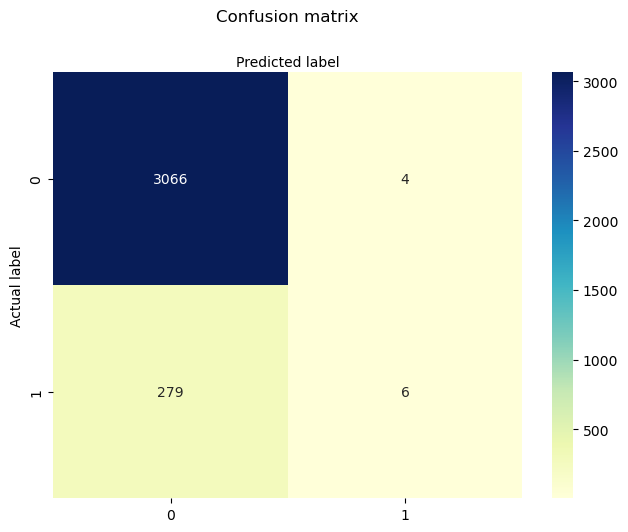

In [201]:
# Heatmap to show confision matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Evaluation Metrics

In [202]:
# Report with classification metrics
target_names = ['No casulties', 'Casulties']
report = classification_report(y_test, y_pred, target_names = target_names, output_dict=True)
df_result = pd.DataFrame(report).transpose()

In [203]:
df_result

,precision,recall,f1-score,support
No casulties,0.916592,0.998697,0.955885,3070.000000
Casulties,0.600000,0.021053,0.040678,285.000000
accuracy,0.915648,0.915648,0.915648,0.915648
macro avg,0.758296,0.509875,0.498281,3355.000000
weighted avg,0.889698,0.915648,0.878140,3355.000000


#### ROC Curve

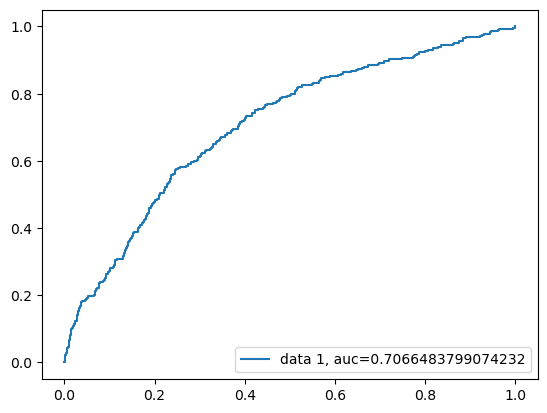

In [204]:
# Receiver Operating Characteristic on chart
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()